In [2]:
#problem: Handwriting Digit Recognition
# Import the modules

from sklearn.datasets import fetch_openml
from skimage.feature import hog
from sklearn.svm import LinearSVC
import numpy as np

In [23]:
db = fetch_openml('diabetes')

C:\Users\Pankaj\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:373: UserWarning: Multiple active versions of the dataset matching the name diabetes exist. Versions may be fundamentally different, returning version 1.
  warn("Multiple active versions of the dataset matching the name"


In [25]:
print(db.DESCR)

**Author**: [Vincent Sigillito](vgs@aplcen.apl.jhu.edu)  

**Source**: [Obtained from UCI](https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes) 

**Please cite**: [UCI citation policy](https://archive.ics.uci.edu/ml/citation_policy.html)  

1. Title: Pima Indians Diabetes Database
 
 2. Sources:
    (a) Original owners: National Institute of Diabetes and Digestive and
                         Kidney Diseases
    (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                           Research Center, RMI Group Leader
                           Applied Physics Laboratory
                           The Johns Hopkins University
                           Johns Hopkins Road
                           Laurel, MD 20707
                           (301) 953-6231
    (c) Date received: 9 May 1990
 
 3. Past Usage:
     1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., &
        Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
  

In [3]:
#MNIST_784 is the name of data set available in python datasets package
mnist = fetch_openml('MNIST_784')
#mnist is a dictionary which contains lots of data in key-value format

In [4]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [6]:
print(28*28)

784


In [26]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [10]:
print(mnist['target'])

['5' '0' '4' ... '4' '5' '6']


In [9]:
print(mnist['target_names'])

['class']


In [8]:
print(mnist['feature_names'])

['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91', 'pixel9

In [4]:
X = mnist.data 
y = mnist.target

In [14]:
X.shape
#It means X contains 70000 images and each image has 784 pixels(data)

(70000, 784)

In [15]:
y.shape

(70000,)

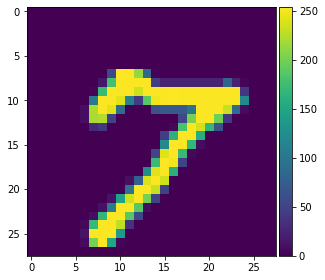

In [8]:
from skimage.io import imread,imshow
digit = X[69000]
digit_pixels = digit.reshape(28, 28)
imshow(digit_pixels)

In [11]:
roi = digit_pixels[6:6+9, 18:18+9]

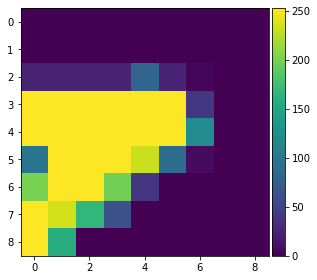

In [12]:
imshow(roi)

In [38]:
list_hog_fd = []
for feature in X:
    fd = hog(feature.reshape((28, 28)), orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1))
    list_hog_fd.append(fd)
hog_features = np.array(list_hog_fd, 'float64')

In [39]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(hog_features, y)

LinearSVC()

In [29]:
import cv2

In [ ]:
#clf is the model which is ready for prediction 

In [32]:
im = cv2.imread("Pictures\\1.jpg")
 
# Using cv2.imshow() method  
# Displaying the image  
cv2.imshow('image  NIELIT', im) 
  
#waits for user to press any key  
#(this is necessary to avoid Python kernel form crashing) 
cv2.waitKey(0)  
  
#closing all open windows  
cv2.destroyAllWindows() 

In [33]:
im.shape

(546, 768, 3)

In [37]:
im[123]

array([[115, 119, 113],
       [114, 118, 112],
       [114, 119, 110],
       ...,
       [125, 130, 121],
       [126, 131, 122],
       [126, 131, 122]], dtype=uint8)

In [41]:
# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#5,5 is gaussian kernel and 
#sigmaX: Gaussian kernel standard deviation in X direction has been
#set to zero
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)

# Displaying the image  
cv2.imshow('image', im_gray) 
  
#waits for user to press any key  
#(this is necessary to avoid Python kernel form crashing) 
cv2.waitKey(0)  
  
#closing all open windows  
cv2.destroyAllWindows() 

In [42]:
im_gray.shape

(546, 768)

In [43]:
im_gray[0]

array([110, 111, 111, 110, 109, 109, 109, 109, 108, 108, 109, 111, 112,
       113, 113, 112, 113, 114, 115, 115, 115, 115, 115, 116, 116, 115,
       115, 115, 115, 116, 116, 116, 116, 116, 116, 116, 117, 117, 116,
       115, 115, 116, 116, 116, 116, 117, 117, 117, 117, 117, 116, 116,
       117, 116, 116, 115, 115, 116, 117, 118, 120, 121, 121, 120, 120,
       120, 119, 119, 119, 120, 121, 120, 119, 119, 120, 121, 122, 121,
       120, 119, 119, 119, 119, 119, 120, 121, 121, 121, 122, 122, 122,
       122, 121, 121, 121, 121, 122, 123, 124, 124, 124, 123, 124, 124,
       123, 122, 121, 120, 121, 122, 122, 121, 121, 122, 123, 124, 125,
       125, 125, 124, 124, 124, 125, 125, 126, 127, 127, 127, 126, 125,
       124, 124, 125, 125, 126, 126, 126, 126, 125, 126, 126, 127, 128,
       128, 128, 128, 127, 126, 126, 126, 126, 125, 125, 125, 126, 127,
       128, 128, 127, 127, 127, 129, 130, 131, 130, 129, 128, 128, 128,
       127, 127, 126, 126, 127, 127, 127, 128, 129, 129, 129, 13

In [44]:
# Threshold the image
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

In [ ]:
im_th.shape

In [45]:
print(rects)

[(22, 235, 82, 80), (257, 232, 60, 83), (135, 231, 70, 82), (452, 228, 19, 84), (350, 227, 60, 83), (510, 226, 44, 81), (680, 220, 48, 97), (601, 219, 52, 88)]


In [46]:


# For each rectangular region, calculate HOG features and predict
# the digit using Linear SVM.
im = cv2.imread("Pictures\\1.jpg")

for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
     # Make the rectangular region around the digit
    leng = int(rect[3] * 1)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    #roi = im_th[rect[1]:rect[1]+rect[2],rect[0]:rect[0]+rect[3]]
    # Resize the image
    print(roi.shape)
    roi = cv2.resize(roi, (28,28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    # Calculate the HOG features
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1))
    nbr = clf.predict(np.array([roi_hog_fd], 'float64'))
    cv2.putText(im, str(int(nbr[0])), (rect[0], rect[1]),cv2.FONT_HERSHEY_DUPLEX, 2, (0, 255, 255), 3)

cv2.imshow("Resulting Image with Rectangular ROIs", im)
cv2.waitKey()

(80, 80)
(83, 83)
(82, 82)
(84, 84)
(83, 83)
(81, 81)
(97, 97)
(88, 88)


13

In [ ]:
im = cv2.imread("Pictures\\2.png")
 
# Using cv2.imshow() method  
# Displaying the image  
cv2.imshow('image', im) 
  
#waits for user to press any key  
#(this is necessary to avoid Python kernel form crashing) 
cv2.waitKey(0)  
  
#closing all open windows  
cv2.destroyAllWindows() 

In [ ]:
# Convert to grayscale and apply Gaussian filtering
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)

# Displaying the image  
cv2.imshow('image', im_gray) 
  
#waits for user to press any key  
#(this is necessary to avoid Python kernel form crashing) 
cv2.waitKey(0)  
  
#closing all open windows  
cv2.destroyAllWindows() 

In [ ]:
# Threshold the image
ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)

# Find contours in the image
ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

In [47]:
print(rects)

[(22, 235, 82, 80), (257, 232, 60, 83), (135, 231, 70, 82), (452, 228, 19, 84), (350, 227, 60, 83), (510, 226, 44, 81), (680, 220, 48, 97), (601, 219, 52, 88)]


In [ ]:

# For each rectangular region, calculate HOG features and predict
# the digit using Linear SVM.
im = cv2.imread("Pictures\\2.jpg")
y_predict=[]

for rect in rects:
    # Draw the rectangles
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
     # Make the rectangular region around the digit
    leng = int(rect[3] * 1)
    pt1 = int(rect[1] + rect[3] // 2 - leng // 2)
    pt2 = int(rect[0] + rect[2] // 2 - leng // 2)
    roi = im_th[pt1:pt1+leng, pt2:pt2+leng]
    #roi = im_th[rect[1]:rect[1]+rect[2],rect[0]:rect[0]+rect[3]]
    # Resize the image
    print(roi.shape)
    roi = cv2.resize(roi, (28,28), interpolation=cv2.INTER_AREA)
    roi = cv2.dilate(roi, (3, 3))
    # Calculate the HOG features
    roi_hog_fd = hog(roi, orientations=9, pixels_per_cell=(14, 14), cells_per_block=(1, 1))
    nbr = clf.predict(np.array([roi_hog_fd], 'float64'))
    y_predict.append(nbr[0])
    

cv2.waitKey()

print(y_predict)